From the data analyzed, it appears to show a strong direct correlation between latitude and temperature.  Temperatures in proximity to the equator appeared the highest, with low temperatures appearing in cities furthest from the equator both north and south.  Wind speed also seemed to be lower the closer the city was to the equator. Cloudiness seemed to show a very weak correlation, with the possibility of no real relation or possibly only being driven by the wind factor.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
#  Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

citys = []
cloud = []
humid = []
lats = []
lngs = []
temp = []
wind = []
countries = []

count = 1

# loop for dataframe columns
for city in cities:
    print(f"Processing {count} || {city}")
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        citys.append(response['name'])
        cloud.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humid.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except Exception:
        print("City not found. Skip me.")
    count += 1
print("End City List")

Processing 1 || amderma
City not found. Skip me.
Processing 2 || barrow
Processing 3 || vaini
Processing 4 || funtua
Processing 5 || mataura
Processing 6 || punta arenas
Processing 7 || hobart
Processing 8 || diego de almagro
City not found. Skip me.
Processing 9 || kapaa
Processing 10 || hermanus
Processing 11 || qaqortoq
Processing 12 || atar
Processing 13 || abay
Processing 14 || busselton
Processing 15 || coquimbo
Processing 16 || klaksvik
Processing 17 || yambio
Processing 18 || paamiut
Processing 19 || rawson
Processing 20 || geraldton
Processing 21 || bluefields
Processing 22 || dikson
Processing 23 || ushuaia
Processing 24 || lompoc
Processing 25 || albany
Processing 26 || fortuna
Processing 27 || ponta do sol
Processing 28 || merrill
Processing 29 || tuktoyaktuk
Processing 30 || izhma
Processing 31 || vitimskiy
City not found. Skip me.
Processing 32 || taolanaro
City not found. Skip me.
Processing 33 || pisco
Processing 34 || plymouth
Processing 35 || timberlake
Processing 36 

Processing 283 || ibotirama
Processing 284 || kondinskoye
Processing 285 || avera
Processing 286 || bathsheba
Processing 287 || naze
Processing 288 || hargeysa
Processing 289 || hami
Processing 290 || kavieng
Processing 291 || kieta
Processing 292 || salalah
Processing 293 || genhe
Processing 294 || evensk
Processing 295 || darhan
Processing 296 || harwich
Processing 297 || severo-kurilsk
Processing 298 || seropedica
Processing 299 || amga
Processing 300 || ilulissat
Processing 301 || isiro
Processing 302 || aberdeen
Processing 303 || castro
Processing 304 || ostrovnoy
Processing 305 || haverfordwest
Processing 306 || road town
City not found. Skip me.
Processing 307 || campamento
Processing 308 || shakhta
Processing 309 || fianarantsoa
Processing 310 || wanning
Processing 311 || shingu
Processing 312 || haines junction
Processing 313 || torbay
Processing 314 || baruun-urt
Processing 315 || beaverlodge
Processing 316 || lasem
Processing 317 || ambilobe
Processing 318 || motema
Processi

Processing 559 || palabuhanratu
City not found. Skip me.
Processing 560 || cordoba
Processing 561 || stornoway
Processing 562 || nampula
Processing 563 || sao felix do xingu
Processing 564 || mahon
Processing 565 || kodinsk
Processing 566 || corowa
Processing 567 || rundu
Processing 568 || skibotn
Processing 569 || pathein
Processing 570 || esmeraldas
Processing 571 || hobyo
Processing 572 || kedrovyy
Processing 573 || yaan
Processing 574 || khandyga
Processing 575 || utiroa
City not found. Skip me.
Processing 576 || marzuq
Processing 577 || flinders
Processing 578 || beaufort
Processing 579 || camocim de sao felix
Processing 580 || kolokani
Processing 581 || meulaboh
Processing 582 || kawalu
Processing 583 || onega
Processing 584 || ayan
Processing 585 || cap-aux-meules
Processing 586 || tonaya
Processing 587 || marrakesh
End City List


In [4]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
weather_dataframe = pd.DataFrame({
    "City": citys,
    "Cloudiness": cloud,
    "Country": countries,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": temp,
    "Wind Speeds": wind,
    })

weather_dataframe.to_csv('../WeatherPy/output_file.csv', index=False)

weather_dataframe.count()

City               531
Cloudiness         531
Country            531
Humidity           531
Latitude           531
Longitude          531
Max Temperature    531
Wind Speeds        531
dtype: int64

In [5]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

weather_dataframe.loc[weather_dataframe['Humidity']>=100]

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
23,Fortuna,90,US,100,40.60,-124.16,51.01,6.93
24,Ponta,25,PT,100,38.73,-28.27,65.41,25.66
116,Yellowknife,90,CA,100,62.46,-114.35,21.20,10.29
120,Nikolskoye,90,RU,100,59.70,30.79,34.00,6.71
199,Kiryat Gat,91,IL,100,31.61,34.76,72.00,1.48
299,Hambantota,90,LK,100,6.12,81.12,75.20,2.24
381,Paraíso,75,CR,100,9.84,-83.87,69.80,4.70
409,Cayenne,75,GF,100,4.93,-52.33,77.00,10.85
485,Villa di Tirano,0,IT,100,46.20,10.13,55.00,2.24
492,Bytom,90,PL,100,50.35,18.93,39.00,8.05


In [6]:
# Get the indices of cities that have humidity over 100%.
upper_outliers = weather_dataframe.loc[weather_dataframe['Humidity']>=100].index
upper_outliers

Int64Index([23, 24, 116, 120, 199, 299, 381, 409, 485, 492, 514, 516], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dataframe.drop(upper_outliers)
clean_city_data

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
0,Barrow,90,US,68,71.29,-156.79,24.80,13.87
1,Vaini,75,TO,74,-21.20,-175.20,80.60,13.87
2,Funtua,29,NG,30,11.52,7.31,70.38,8.63
3,Mataura,97,NZ,75,-46.19,168.86,57.00,17.00
4,Punta,100,PH,63,8.99,125.34,85.82,1.70
...,...,...,...,...,...,...,...,...
526,Onega,4,RU,96,63.91,38.14,30.96,6.73
527,Ayan,100,RU,97,56.45,138.17,26.98,21.34
528,Cap-aux-Meules,0,CA,64,47.38,-61.86,37.40,12.75
529,Tonaya,40,MX,83,19.78,-103.97,75.20,1.10


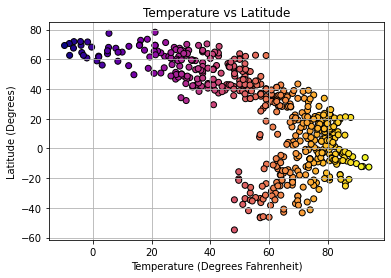

In [8]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

plt.scatter(clean_city_data["Max Temperature"], clean_city_data["Latitude"], c=clean_city_data['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [9]:
# Save as a file
plt.savefig('../WeatherPy/Images/TempLat.png')

<Figure size 432x288 with 0 Axes>

In [10]:
# Print your analysis
print("This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.")

This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.


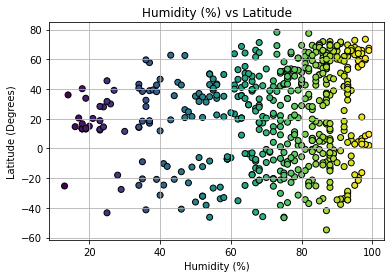

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot your Humidity vs Latitude
plt.scatter(clean_city_data["Humidity"], clean_city_data["Latitude"], c=clean_city_data['Humidity'], edgecolors="black", cmap="viridis")
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save a file
plt.savefig('../WeatherPy/Images/HumidLat.png')

In [12]:
# Type analysis
print("This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.")

This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.


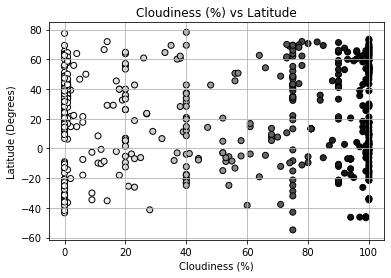

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot Cloudiness vs lat
plt.scatter(clean_city_data["Cloudiness"], clean_city_data["Latitude"], c=clean_city_data['Cloudiness'], edgecolors="black", cmap="Greys")
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLat.png')

In [14]:
# Analysis
print("The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.")

The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.


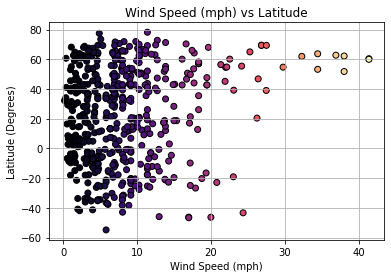

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot Wind Speeds vs Lat
plt.scatter(clean_city_data["Wind Speeds"], clean_city_data["Latitude"], c=clean_city_data['Wind Speeds'], edgecolors="black", cmap="magma")
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLat.png')

In [16]:
# Analysis 
print("Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.")

Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.


In [17]:
# use .loc for northern and southern hemispheres
northern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']>=0]
southern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']<0]

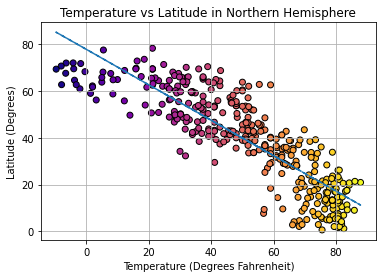

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot Max Temp vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Max Temperature"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Max Temperature"]) + int
plt.plot(northern_hemi["Max Temperature"], fit, "--")

# Create the scatter plot
plt.scatter(northern_hemi["Max Temperature"], northern_hemi["Latitude"], c=northern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/TempLatNorth.png')

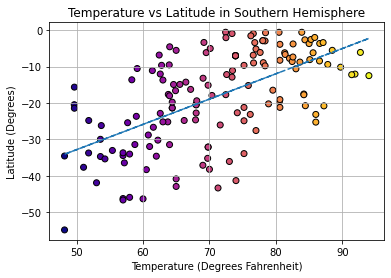

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot Max Temp vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Max Temperature"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Max Temperature"]) + int
plt.plot(southern_hemi["Max Temperature"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Max Temperature"], southern_hemi["Latitude"], c=southern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/TempLatSouth.png')

In [20]:
# Analysis 
print("As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.")

As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.


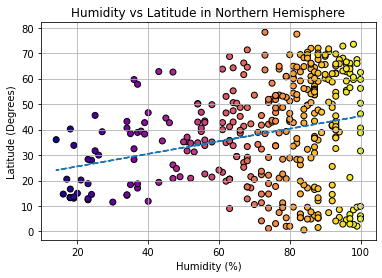

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot Humidity vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Humidity"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Humidity"]) + int
plt.plot(northern_hemi["Humidity"], fit, "--")

# Create your scatter plot
plt.scatter(northern_hemi["Humidity"], northern_hemi["Latitude"], c=northern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/HumidLatNorth.png')

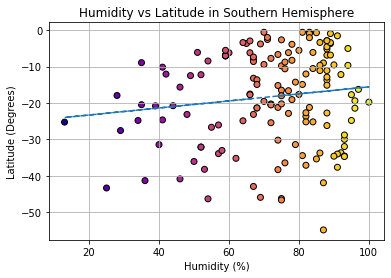

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot Humidity vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Humidity"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Humidity"]) + int
plt.plot(southern_hemi["Humidity"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Humidity"], southern_hemi["Latitude"], c=southern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/HumidLatSouth.png')

In [23]:
# Analysis
print("Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.")

Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.


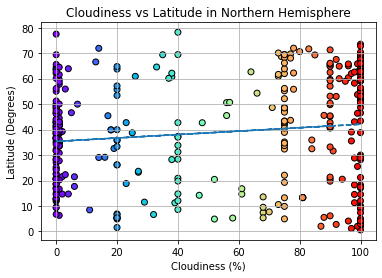

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot Cloudiness vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Cloudiness"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Cloudiness"]) + int
plt.plot(northern_hemi["Cloudiness"], fit, "--")

# Make your scatter plot
plt.scatter(northern_hemi["Cloudiness"], northern_hemi["Latitude"], c=northern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLatNorth.png')

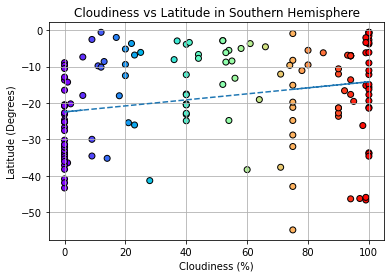

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot Cloudiness vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Cloudiness"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Cloudiness"]) + int
plt.plot(southern_hemi["Cloudiness"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Cloudiness"], southern_hemi["Latitude"], c=southern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLatSouth.png')

In [26]:
# Analysis
print("Cloudiness does not seem to be affected by latitude.")

Cloudiness does not seem to be affected by latitude.


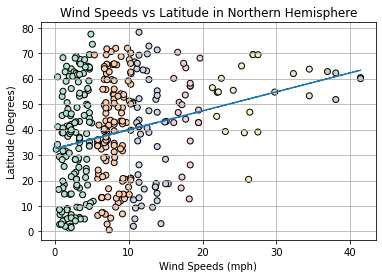

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot Wind Speeds vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Wind Speeds"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Wind Speeds"]) + int
plt.plot(northern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(northern_hemi["Wind Speeds"], northern_hemi["Latitude"], c=northern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel2")
plt.title("Wind Speeds vs Latitude in Northern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLatNorth.png')

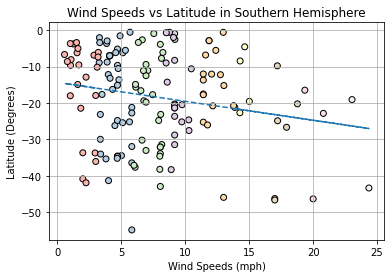

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot Wind Speeds vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Wind Speeds"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Wind Speeds"]) + int
plt.plot(southern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Wind Speeds"], southern_hemi["Latitude"], c=southern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel1")
plt.title("Wind Speeds vs Latitude in Southern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLatSouth.png')

In [29]:
# Analysis
print("Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.")

Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.
